In [1]:
import pandas as pd

In [3]:
fraud = pd.read_csv("Fraud.csv")

In [3]:
fraud.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
fraud = fraud.drop(columns = ["isFlaggedFraud"])

In [5]:
fraud.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
dtype: int64

In [6]:
fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [7]:
zero_counts = (fraud == 0).sum()
zero_counts

step                    0
type                    0
amount                 16
nameOrig                0
oldbalanceOrg     2102449
newbalanceOrig    3609566
nameDest                0
oldbalanceDest    2704388
newbalanceDest    2439433
isFraud           6354407
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import numpy as np

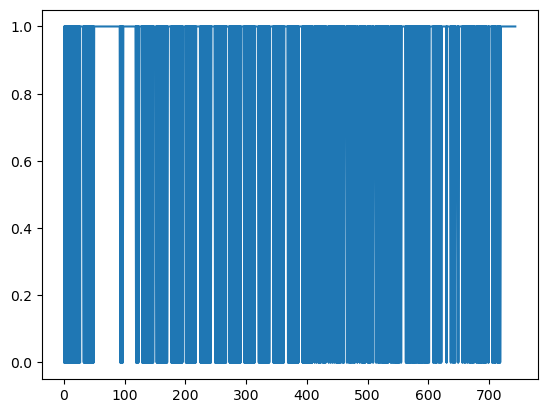

In [9]:
plt.plot(fraud['step'], fraud['isFraud'])

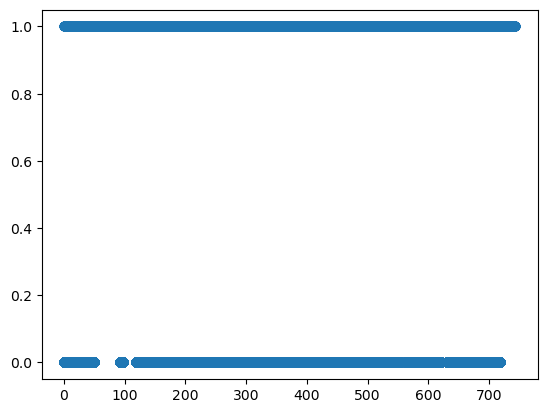

In [10]:
plt.scatter(fraud['step'], fraud['isFraud'])


In [ ]:
plt.bar(fraud['step'], fraud['isFraud'])

In [ ]:
plt.hist(fraud, bins=10)

In [ ]:
plt.boxplot(fraud)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(fraud['step'], fraud['isFraud'], alpha=1)
plt.xlabel('Step')
plt.ylabel('isFraud')
plt.title('Scatter Plot of Step vs isFraud')
plt.show()


In [8]:
# Calculate total fraudulent transactions per step
fraud_per_step = fraud.groupby('step')['isFraud'].sum()

# Convert to DataFrame for clarity (optional)
frame = fraud_per_step.reset_index(name='fraud_count')

print(fraud.head())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155             0.0             0.0        0  
1  M2044282225             0.0             0.0        0  
2   C553264065             0.0             0.0        1  
3    C38997010         21182.0             0.0        1  
4  M1230701703             0.0             0.0        0  


In [11]:
# Calculate total fraudulent transactions per step
fraud_per_step = fraud.groupby('step')['isFraud'].sum().reset_index(name='fraud_count')

print(fraud_per_step.head())


   step  fraud_count
0     1           16
1     2            8
2     3            4
3     4           10
4     5            6


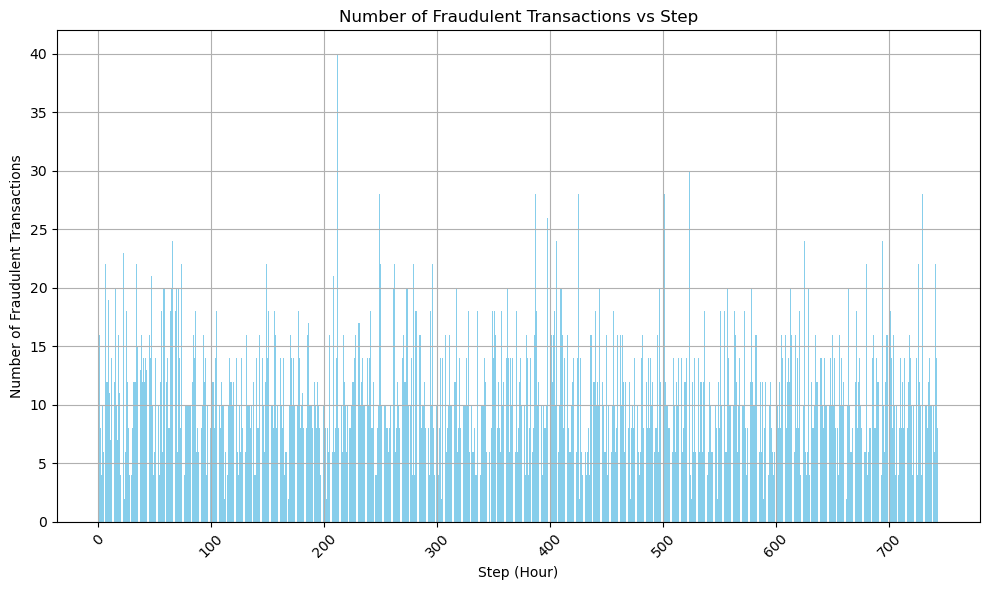

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(fraud_per_step['step'], fraud_per_step['fraud_count'], color='skyblue')
plt.xlabel('Step (Hour)')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Number of Fraudulent Transactions vs Step')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [11]:
# Calculate total fraudulent transactions per transaction type
fraud_per_type = fraud.groupby('type')['isFraud'].sum().reset_index(name='fraud_count')

print(fraud_per_type.head())


       type  fraud_count
0   CASH_IN            0
1  CASH_OUT         4116
2     DEBIT            0
3   PAYMENT            0
4  TRANSFER         4097


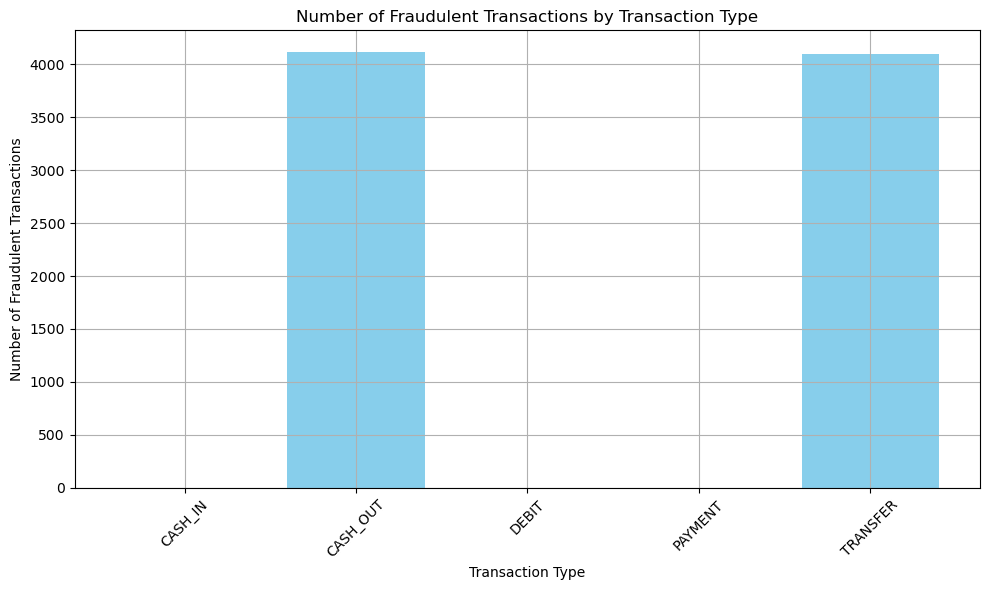

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(fraud_per_type['type'], fraud_per_type['fraud_count'], color='skyblue')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Number of Fraudulent Transactions by Transaction Type')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



In [13]:
# Group by 'step' and count the number of fraudulent transactions
fraud_per_step = fraud.groupby('step')['isFraud'].sum().reset_index(name='fraud_count')

# Identify steps with zero fraud
steps_with_zero_fraud = fraud_per_step[fraud_per_step['fraud_count'] == 0]['step'].tolist()

print("Steps with zero fraud committed:", steps_with_zero_fraud)


Steps with zero fraud committed: [347, 545]


In [17]:
# Filter rows where 'step' column is equal to 347
step_347_data = fraud[fraud['step'] == 347]

# Display the filtered data
print("Rows where step number is 347:")

print(step_347_data)


Rows where step number is 347:
         step      type     amount     nameOrig  oldbalanceOrg  \
4826429   347   PAYMENT   24397.08  C2003447429       47003.00   
4826430   347  CASH_OUT  425481.65  C1632450194        1781.00   
4826431   347   PAYMENT   24507.09  C1673794240       61363.00   
4826432   347   PAYMENT   30909.01   C877101186       21239.00   
4826433   347   CASH_IN   65312.04  C2141687402       53008.00   
...       ...       ...        ...          ...            ...   
4856646   347  CASH_OUT  113285.47  C1546748674           0.00   
4856647   347  CASH_OUT  211963.45  C1185728397           0.00   
4856648   347   CASH_IN  342777.86   C471625342       10514.00   
4856649   347   CASH_IN  197829.79  C1140440324      251278.00   
4856650   347   PAYMENT   10305.49   C327163882      449107.79   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  
4826429        22605.92   M393004226            0.00            0.00        0  
4826430         

In [15]:
# Filter rows where 'step' column is equal to 347 and 'isFraud' column is equal to 1
step_347_isFraud_1 = fraud[(fraud['step'] == 347) & (fraud['isFraud'] == 1)]

# Display the filtered data
print("Rows where step number is 347 and isFraud is 1:")
print(step_347_isFraud_1)


Rows where step number is 347 and isFraud is 1:
Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud]
Index: []


In [17]:
fraud = fraud[~fraud['type'].isin(['CASH_IN', 'DEBIT', 'PAYMENT'])]


In [11]:
print(fraud)

         step      type      amount     nameOrig  oldbalanceOrg  \
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
15          1  CASH_OUT   229133.94   C905080434       15325.00   
19          1  TRANSFER   215310.30  C1670993182         705.00   
24          1  TRANSFER   311685.89  C1984094095       10835.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  
2                   0.0   C553264065            0.00            0.00        1  
3                   0.0    C3899701

In [25]:
fraudd = fraud[fraud['isFraud']==1]
normal = fraud[fraud['isFraud']==0]

In [27]:
print(fraudd.shape, normal.shape)

(8213, 10) (2762196, 10)


In [37]:
fraudd.amount.describe()

count       8213.000
mean     1467967.299
std      2404252.947
min            0.000
25%       127091.330
50%       441423.440
75%      1517771.480
max     10000000.000
Name: amount, dtype: float64

In [19]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [19]:
# Calculate total fraudulent transactions per transaction type
fraud_per_type1 = fraud.groupby('type')['isFraud'].sum().reset_index(name='fraud_count')

print(fraud_per_type1.head())

       type  fraud_count
0  CASH_OUT         4116
1  TRANSFER         4097


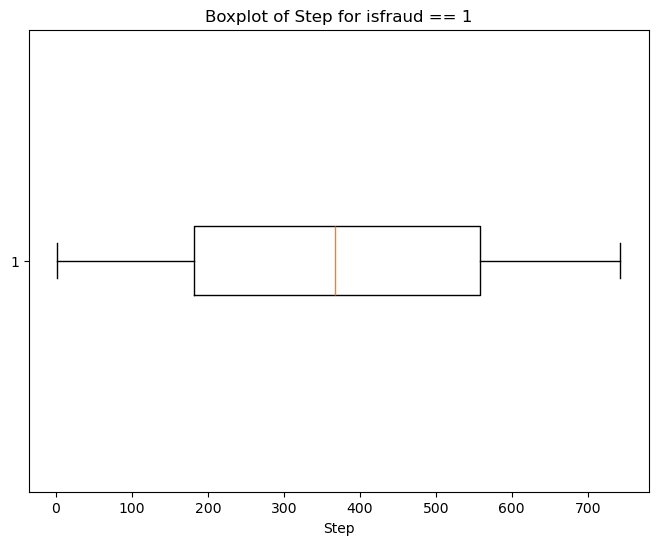

In [43]:
fraud_filtered = fraud[fraud['isFraud'] == 1]

# Create a boxplot of 'step' column for isfraud == 1
plt.figure(figsize=(8, 6))
plt.boxplot(fraud_filtered['step'], vert=False)
plt.xlabel('Step')
plt.title('Boxplot of Step for isfraud == 1')
plt.show()

In [45]:
fraudd.step.describe()

count   8213.000
mean     368.414
std      216.389
min        1.000
25%      181.000
50%      367.000
75%      558.000
max      743.000
Name: step, dtype: float64

In [29]:
import matplotlib.pyplot as plt
import numpy as np

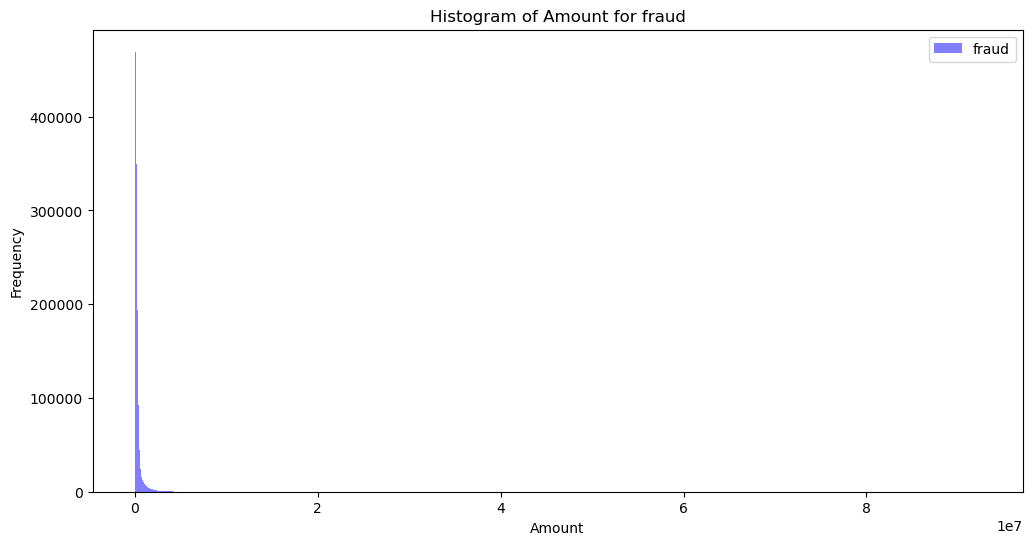

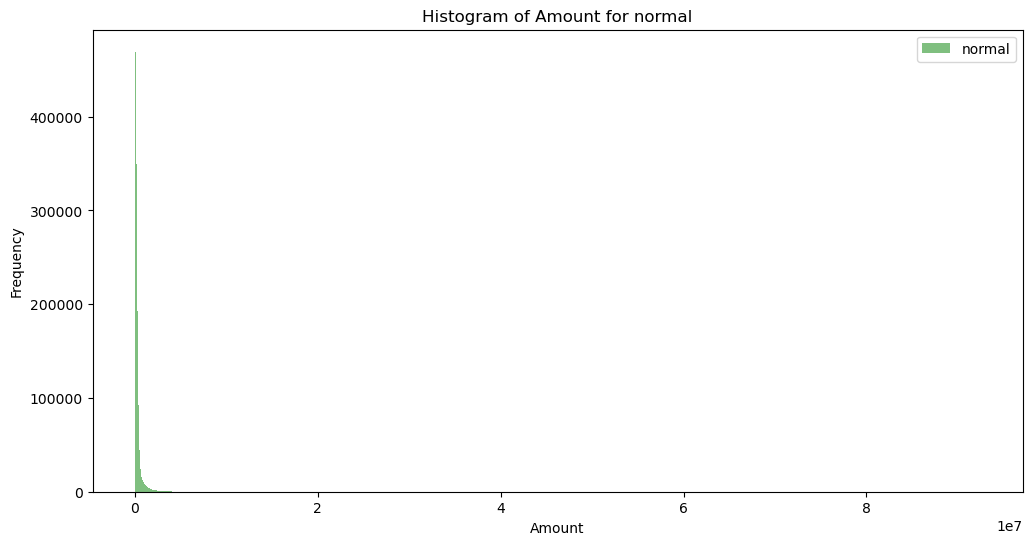

In [55]:
bins_fraud = int(np.sqrt(len(fraud)))  # Square root of number of samples
bins_normal = int(np.sqrt(len(normal)))  # Square root of number of samples

# Create histograms for 'amount' column in fraud
plt.figure(figsize=(12, 6))
plt.hist(fraud['amount'], bins=bins_fraud, alpha=0.5, color='blue', label='fraud')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount for fraud')
plt.legend()
plt.show()

# Create histograms for 'amount' column in normal
plt.figure(figsize=(12, 6))
plt.hist(normal['amount'], bins=bins_normal, alpha=0.5, color='green', label='normal')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount for normal')
plt.legend()
plt.show()

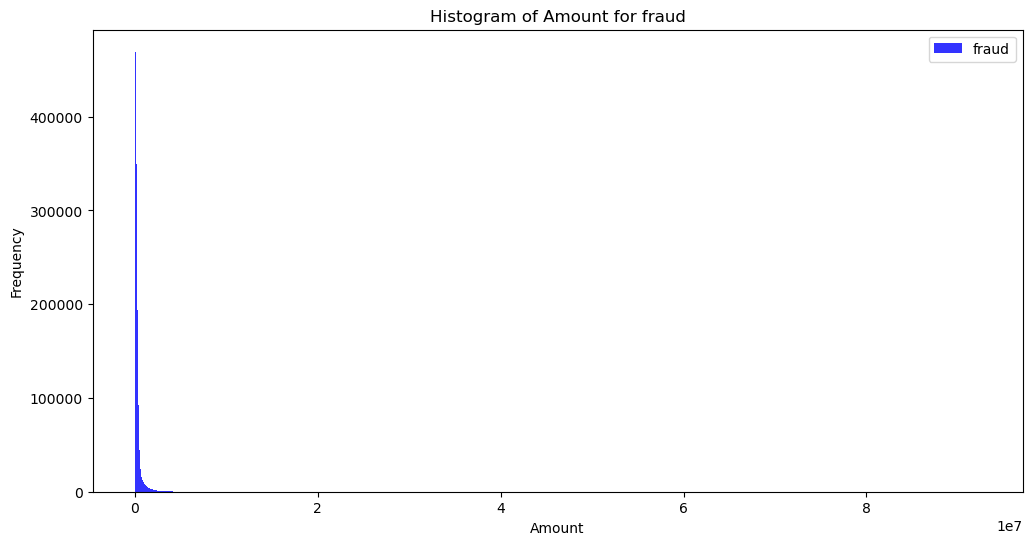

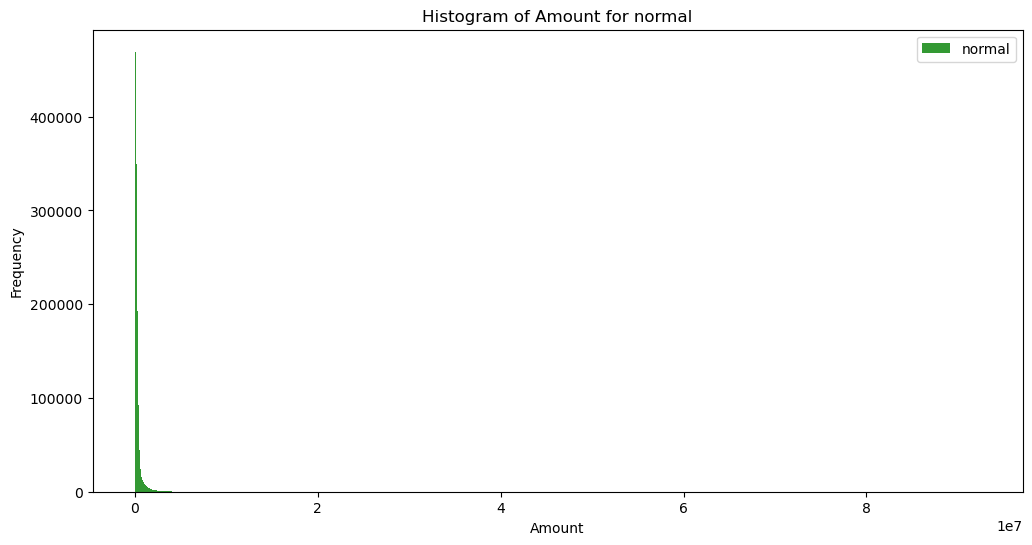

In [57]:
bins_fraud = int(np.sqrt(len(fraud)))  # Square root of number of samples
bins_normal = int(np.sqrt(len(normal)))  # Square root of number of samples

# Create histograms for 'amount' column in fraud with larger bars
plt.figure(figsize=(12, 6))
plt.hist(fraud['amount'], bins=bins_fraud, alpha=0.8, color='blue', label='fraud')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount for fraud')
plt.legend()
plt.show()

# Create histograms for 'amount' column in normal with larger bars
plt.figure(figsize=(12, 6))
plt.hist(normal['amount'], bins=bins_normal, alpha=0.8, color='green', label='normal')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount for normal')
plt.legend()
plt.show()

In [21]:
fraud1 = fraud.sample(frac=0.1, random_state=42)

In [37]:
print(fraud1.shape)

(277041, 10)


In [57]:
print(fraud1)

         step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
1442460   140 285073.760     229352.640           0.000           0.000   
5847267   402 204657.380       5093.000           0.000      911883.620   
2163940   184  27554.100          0.000           0.000      154247.810   
2689116   210 100950.610          0.000           0.000     3946646.290   
1452693   140  42737.060          0.000           0.000      409890.880   
...       ...        ...            ...             ...             ...   
1803604   162 116289.730      31642.000           0.000     3637002.140   
3048130   234  42554.590          0.000           0.000      318272.890   
4673982   331 271868.370        206.000           0.000     5756777.520   
6131811   542 314360.480      38829.000           0.000      670119.930   
2967344   231  29494.020          0.000           0.000      237151.700   

         newbalanceDest  isFraud  type_encoded  
1442460      285073.760        0             0  
5

In [57]:
correlation_matrix = fraud1.corr()

# Print correlation matrix
print(correlation_matrix)

ValueError: could not convert string to float: 'CASH_OUT'

In [71]:
import numpy as np
numeric_columns = fraud1.select_dtypes(include=[np.number])  # Select numeric columns only
correlation_matrix = numeric_columns.corr()

In [ ]:
# Example: Using one-hot encoding for categorical columns
encoded_df = pd.get_dummies(fraud1)  # Converts categorical variables into dummy/indicator variables
correlation_matrix = encoded_df.corr()


In [23]:
# Label Encoding
fraud1['type_encoded'] = fraud['type'].map({'CASH_OUT': 0, 'TRANSFER': 1})

print(fraud1)

         step      type     amount     nameOrig  oldbalanceOrg  \
1442460   140  CASH_OUT 285073.760  C1243325987     229352.640   
5847267   402  CASH_OUT 204657.380  C1319437678       5093.000   
2163940   184  CASH_OUT  27554.100  C1632235813          0.000   
2689116   210  CASH_OUT 100950.610  C1696293785          0.000   
1452693   140  CASH_OUT  42737.060   C791832067          0.000   
...       ...       ...        ...          ...            ...   
1803604   162  CASH_OUT 116289.730  C1698503113      31642.000   
3048130   234  CASH_OUT  42554.590  C2058088646          0.000   
4673982   331  CASH_OUT 271868.370  C1518055568        206.000   
6131811   542  CASH_OUT 314360.480   C574266860      38829.000   
2967344   231  CASH_OUT  29494.020   C435877670          0.000   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
1442460           0.000   C653737184           0.000      285073.760        0   
5847267           0.000  C1983611293      911

In [27]:
fraud1 = fraud1.drop(columns = "type")

In [29]:
fraud1 = fraud1.drop(columns = "nameOrig")
fraud1 = fraud1.drop(columns = "nameDest")

In [33]:
fraud1.nunique()

step                 620
amount            275910
oldbalanceOrg      85800
newbalanceOrig     27447
oldbalanceDest    237630
newbalanceDest    273092
isFraud                2
type_encoded           2
dtype: int64

In [35]:
X = fraud1.drop('isFraud', axis=1)
y = fraud1['isFraud']

# Display the DataFrame to check the encoding and the feature-target split
print("Encoded DataFrame:\n", fraud1)
print("\nFeatures (X):\n", X)
print("\nTarget (y):\n", y)

Encoded DataFrame:
          step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
1442460   140 285073.760     229352.640           0.000           0.000   
5847267   402 204657.380       5093.000           0.000      911883.620   
2163940   184  27554.100          0.000           0.000      154247.810   
2689116   210 100950.610          0.000           0.000     3946646.290   
1452693   140  42737.060          0.000           0.000      409890.880   
...       ...        ...            ...             ...             ...   
1803604   162 116289.730      31642.000           0.000     3637002.140   
3048130   234  42554.590          0.000           0.000      318272.890   
4673982   331 271868.370        206.000           0.000     5756777.520   
6131811   542 314360.480      38829.000           0.000      670119.930   
2967344   231  29494.020          0.000           0.000      237151.700   

         newbalanceDest  isFraud  type_encoded  
1442460      285073.760       

In [39]:
import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Assuming you have already defined X and y
# Apply Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.1, random_state=42)
y_pred_iso = iso_forest.fit_predict(X)

# Remove the detected anomalies
mask = y_pred_iso != -1
X_clean = X[mask]
y_clean = y[mask]

# Split the cleaned data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74710
           1       0.94      0.37      0.53        92

    accuracy                           1.00     74802
   macro avg       0.97      0.68      0.77     74802
weighted avg       1.00      1.00      1.00     74802

Accuracy Score: 0.9992


In [41]:
import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Assuming you have already defined X and y
# Apply Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.1, random_state=42)
y_pred_iso = iso_forest.fit_predict(X)

# Apply Local Outlier Factor (LOF) to detect anomalies
lof = LocalOutlierFactor(contamination=0.1)
y_pred_lof = lof.fit_predict(X)

# Remove the detected anomalies using Isolation Forest
mask_iso = y_pred_iso != -1
X_clean_iso = X[mask_iso]
y_clean_iso = y[mask_iso]

# Remove the detected anomalies using LOF
mask_lof = y_pred_lof != -1
X_clean_lof = X[mask_lof]
y_clean_lof = y[mask_lof]

# Split the cleaned data from both methods into training and test sets
X_train_iso, X_test_iso, y_train_iso, y_test_iso = train_test_split(X_clean_iso, y_clean_iso, test_size=0.3, random_state=42)
X_train_lof, X_test_lof, y_train_lof, y_test_lof = train_test_split(X_clean_lof, y_clean_lof, test_size=0.3, random_state=42)

# Train a RandomForestClassifier on Isolation Forest cleaned data
clf_iso = RandomForestClassifier(random_state=42)
clf_iso.fit(X_train_iso, y_train_iso)

# Train a RandomForestClassifier on LOF cleaned data
clf_lof = RandomForestClassifier(random_state=42)
clf_lof.fit(X_train_lof, y_train_lof)

# Predict and evaluate Isolation Forest cleaned data
y_pred_iso = clf_iso.predict(X_test_iso)
print("Evaluation results for Isolation Forest cleaned data:")
print(classification_report(y_test_iso, y_pred_iso))
accuracy_iso = accuracy_score(y_test_iso, y_pred_iso)
print(f"Accuracy Score: {accuracy_iso:.4f}")

# Predict and evaluate LOF cleaned data
y_pred_lof = clf_lof.predict(X_test_lof)
print("\nEvaluation results for LOF cleaned data:")
print(classification_report(y_test_lof, y_pred_lof))
accuracy_lof = accuracy_score(y_test_lof, y_pred_lof)
print(f"Accuracy Score: {accuracy_lof:.4f}")


Evaluation results for Isolation Forest cleaned data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74710
           1       0.94      0.37      0.53        92

    accuracy                           1.00     74802
   macro avg       0.97      0.68      0.77     74802
weighted avg       1.00      1.00      1.00     74802

Accuracy Score: 0.9992

Evaluation results for LOF cleaned data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74595
           1       0.98      0.68      0.80       207

    accuracy                           1.00     74802
   macro avg       0.99      0.84      0.90     74802
weighted avg       1.00      1.00      1.00     74802

Accuracy Score: 0.9991


In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Assuming you have already defined X and y
# Apply Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.1, random_state=42)
y_pred_iso = iso_forest.fit_predict(X)

# Apply Local Outlier Factor (LOF) to detect anomalies
lof = LocalOutlierFactor(contamination=0.1)
y_pred_lof = lof.fit_predict(X)

# Apply One-Class SVM to detect anomalies
svm = OneClassSVM(nu=0.1)
y_pred_svm = svm.fit_predict(X)

# Remove the detected anomalies using Isolation Forest
mask_iso = y_pred_iso != -1
X_clean_iso = X[mask_iso]
y_clean_iso = y[mask_iso]

# Remove the detected anomalies using LOF
mask_lof = y_pred_lof != -1
X_clean_lof = X[mask_lof]
y_clean_lof = y[mask_lof]

# Remove the detected anomalies using One-Class SVM
mask_svm = y_pred_svm != -1
X_clean_svm = X[mask_svm]
y_clean_svm = y[mask_svm]

# Split the cleaned data from all methods into training and test sets
X_train_iso, X_test_iso, y_train_iso, y_test_iso = train_test_split(X_clean_iso, y_clean_iso, test_size=0.3, random_state=42)
X_train_lof, X_test_lof, y_train_lof, y_test_lof = train_test_split(X_clean_lof, y_clean_lof, test_size=0.3, random_state=42)
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_clean_svm, y_clean_svm, test_size=0.3, random_state=42)

# Train a RandomForestClassifier on Isolation Forest cleaned data
clf_iso = RandomForestClassifier(random_state=42)
clf_iso.fit(X_train_iso, y_train_iso)

# Train a RandomForestClassifier on LOF cleaned data
clf_lof = RandomForestClassifier(random_state=42)
clf_lof.fit(X_train_lof, y_train_lof)

# Train a RandomForestClassifier on SVM cleaned data
clf_svm = RandomForestClassifier(random_state=42)
clf_svm.fit(X_train_svm, y_train_svm)

# Predict and evaluate Isolation Forest cleaned data
y_pred_iso = clf_iso.predict(X_test_iso)
print("Evaluation results for Isolation Forest cleaned data:")
print(classification_report(y_test_iso, y_pred_iso))
accuracy_iso = accuracy_score(y_test_iso, y_pred_iso)
print(f"Accuracy Score: {accuracy_iso:.4f}")

# Predict and evaluate LOF cleaned data
y_pred_lof = clf_lof.predict(X_test_lof)
print("\nEvaluation results for LOF cleaned data:")
print(classification_report(y_test_lof, y_pred_lof))
accuracy_lof = accuracy_score(y_test_lof, y_pred_lof)
print(f"Accuracy Score: {accuracy_lof:.4f}")

# Predict and evaluate SVM cleaned data
y_pred_svm = clf_svm.predict(X_test_svm)
print("\nEvaluation results for SVM cleaned data:")
print(classification_report(y_test_svm, y_pred_svm))
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
print(f"Accuracy Score: {accuracy_svm:.4f}")

